In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

In [85]:
pd.set_option('display.max_rows', 500)


In [8]:
df = pd.read_csv('../ZEISS_hacakatum_challenge_dataset.csv')
df['datetime'] = pd.to_datetime(df['datetime'])

def floatToTimedelta(offset):
    return pd.Timedelta("{:02d}:00:00".format(int(offset)))

def func(row):
    return row.datetime + floatToTimedelta(row.UTCOffset)

df['datetime'] = df.apply(func,axis=1)

df = df.drop('UTCOffset', 1)

In [9]:

def get_region(df, region):
    return df.loc[(df['region']==region)]

def get_source_id(df, source_id):
    return df.loc[(df['source_id']==source_id)]

def get_sensor_name(df, sensor_name):
    return df.loc[(df['sensor_name']==sensor_name)]

def get_unique_regions(df):
    return df['region'].unique()

def get_unique_source_ids(df):
    return df['source_id'].unique()

def get_unique_sensor_names(df):
    return df['sensor_name'].unique()

def get_time_interval(df, start_date, end_date):
    return df[(df['datetime'] > start_date) & (df['datetime'] <= end_date)]

def get_available_time_interval(df):
    return (df['datetime'].min(), df['datetime'].max())

In [178]:
new_df = get_time_interval(get_sensor_name(get_source_id((get_region(df, "DACH")), "MICDEV00"), "LSM_HS_SensorCan81_Temperature_Room"), '2021-10-12', '2021-10-23')
new_df = new_df.sort_values(by=['datetime'])


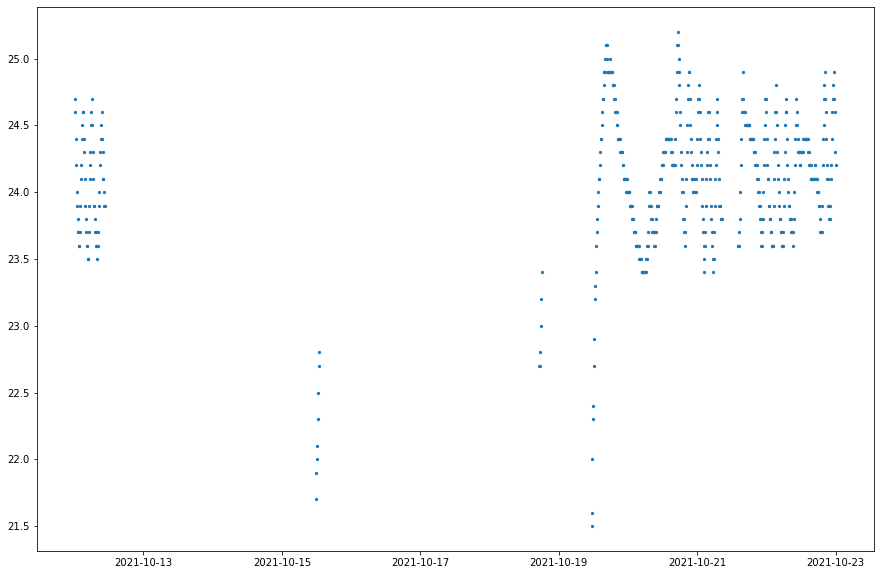

In [179]:
x = np.array(new_df.datetime)
y = np.array(new_df.sensor_value)


sc = plt.scatter(x, y, s=5)
plt.show()

In [180]:
from sklearn.ensemble import IsolationForest


x = np.array(new_df.sensor_value).reshape(-1, 1)
clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.05), max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(x)
y_data = clf.predict(x)

In [181]:
anomalies = []
for i in range(len(y_data)):
    if y_data[i] < 0:
        anomalies.append(i)

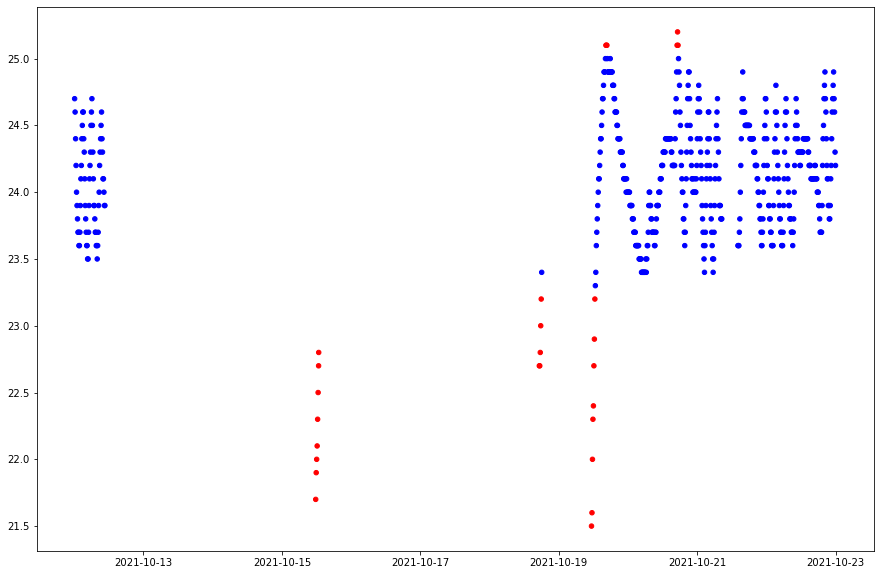

In [182]:
x = np.array(new_df.datetime)
y = np.array(new_df.sensor_value)
plt.scatter(x, y, c=y_data,  s=20, cmap="bwr_r")


In [187]:
date_range_tolerance = 0.1 #in days

date_ranges = [new_df.iloc[anomalies].datetime.iloc[0]]
prev_date = new_df.iloc[anomalies].datetime.iloc[0]
for date in new_df.iloc[anomalies].datetime:
    if pd.Timedelta(date - prev_date).days > date_range_tolerance:
        date_ranges.append(prev_date)
        date_ranges.append(date)
    prev_date = date

date_ranges.append(new_df.iloc[anomalies].datetime.iloc[-1])

In [188]:
print("Anomalies occured in the following periods")
for i in range(0, len(date_ranges), 2):
    print("From:{} to:{}".format(date_ranges[i], date_ranges[i+1]))

Anomalies occured in the following periods
From:2021-10-15 11:42:24+00:00 to:2021-10-15 12:44:51+00:00
From:2021-10-18 17:13:03+00:00 to:2021-10-19 16:38:58+00:00
From:2021-10-20 16:59:04+00:00 to:2021-10-20 17:19:04+00:00


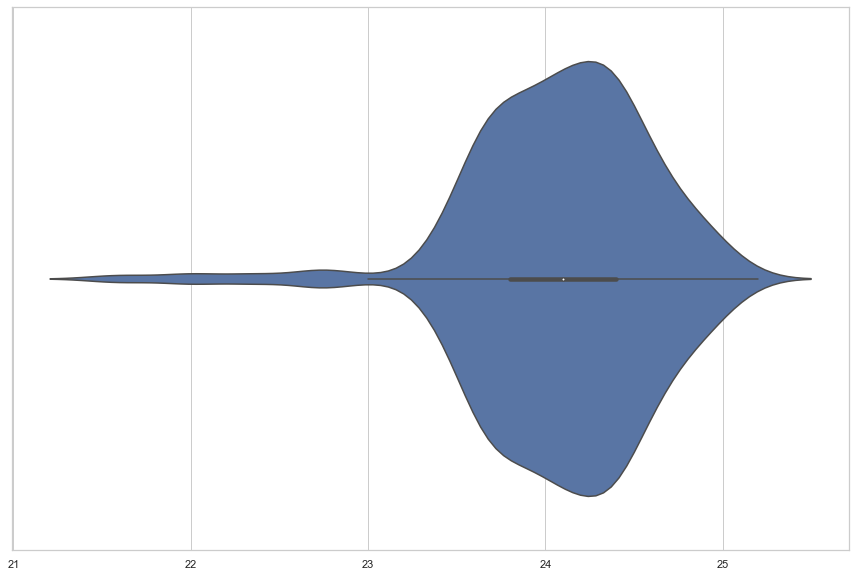

In [192]:
import seaborn as sns

sns.set(style="whitegrid")
ax = sns.violinplot(x=y)